# Main Flow Internship - Data Analysis with Python

# Task - 06: 

## Apply Advanced Statistical and Analytical Methods to Solve Complex Problems

Use the `disney_plus_titles.csv` dataset and perform the following tasks:

**1. Apply time series analysis**  
   - Forecast trends and seasonal patterns.

**2. Conduct sentiment analysis or text mining**  
   - Analyze unstructured textual data.

**3. Explore clustering or classification methods**  
   - Identify segments and patterns within the dataset.

In [17]:
import pandas as pd

def explore_dataset(file_path):
    df = pd.read_csv(file_path)

    print("First few rows of the dataset:")
    print(df.head(), end = '\n')

    print("\nBasic information about the dataset:")
    print(df.info(), end = '\n')

    print("\nColumns in the dataset:")
    print(df.columns)
    print()

    print("\nShape of the dataset:")
    print(df.shape)
    print()
    
    print("\nSize of the dataset:")
    print(df.size)
    print()
    
    print("\nSummary statistics of the dataset:")
    print(df.describe(include='all'))
    print()
    
    print("\nData types of each column:")
    print(df.dtypes)
    print()
    
    print("\nMissing values in each column:")
    print(df.isnull().sum())
    print()
    
    print("\nNumber of unique values in each column:")
    print(df.nunique())
    print()

file_path = 'C:\\users\\banda\\downloads\\disney_plus_titles.csv'
explore_dataset(file_path)


First few rows of the dataset:
  show_id     type                           title  \
0      s1    Movie                   A Spark Story   
1      s2    Movie                  Spooky Buddies   
2      s3    Movie          The Fault in Our Stars   
3      s4  TV Show                 Dog: Impossible   
4      s5  TV Show  Spidey And His Amazing Friends   

                     director  \
0  Jason Sterman, Leanne Dare   
1                Robert Vince   
2                  Josh Boone   
3                         NaN   
4                         NaN   

                                                cast                country  \
0                      Apthon Corbin, Louis Gonzales                    NaN   
1  Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...  United States, Canada   
2  Shailene Woodley, Ansel Elgort, Laura Dern, Sa...          United States   
3                                       Matt Beisner          United States   
4  Benjamin Valic, Lily Sanfelippo, Jakari Fraser.

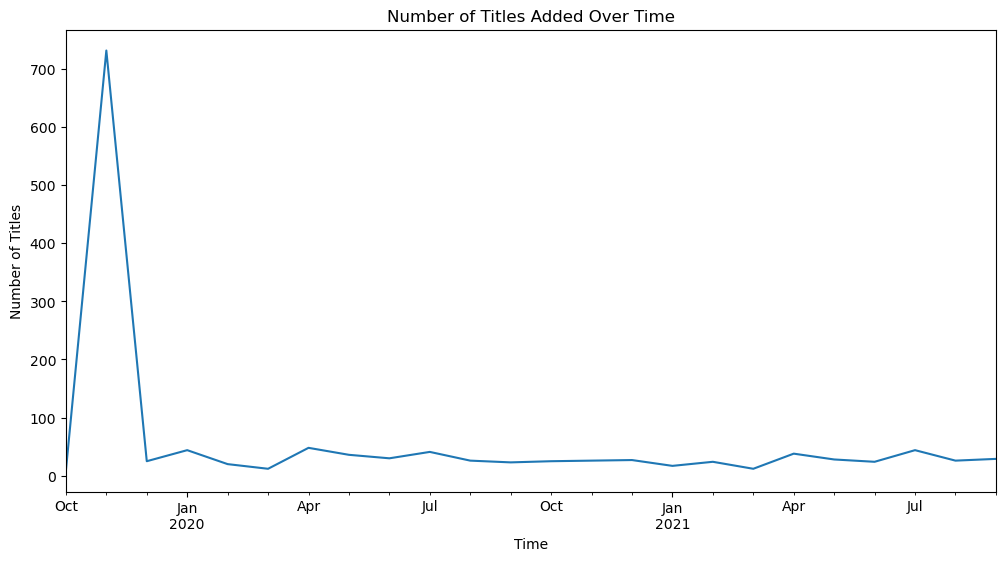

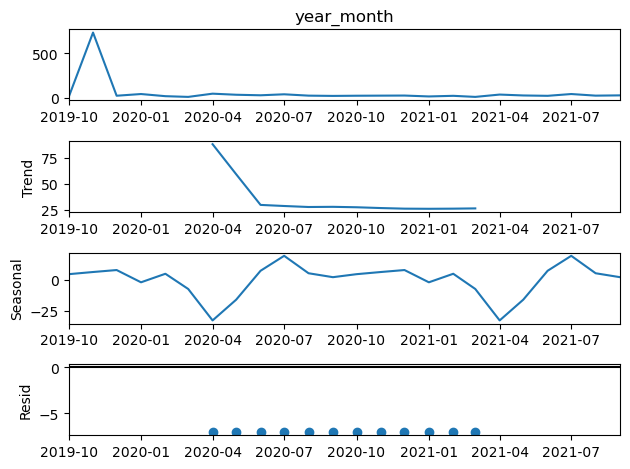

                               SARIMAX Results                                
Dep. Variable:             year_month   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -147.800
Date:                Thu, 06 Jun 2024   AIC                            301.600
Time:                        09:29:40   BIC                            305.006
Sample:                    10-01-2019   HQIC                           302.456
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5637      0.102     -5.541      0.000      -0.763      -0.364
ma.L1         -0.4218      0.241     -1.749      0.080      -0.894       0.051
sigma2      2.128e+04   4152.511      5.124      0.0

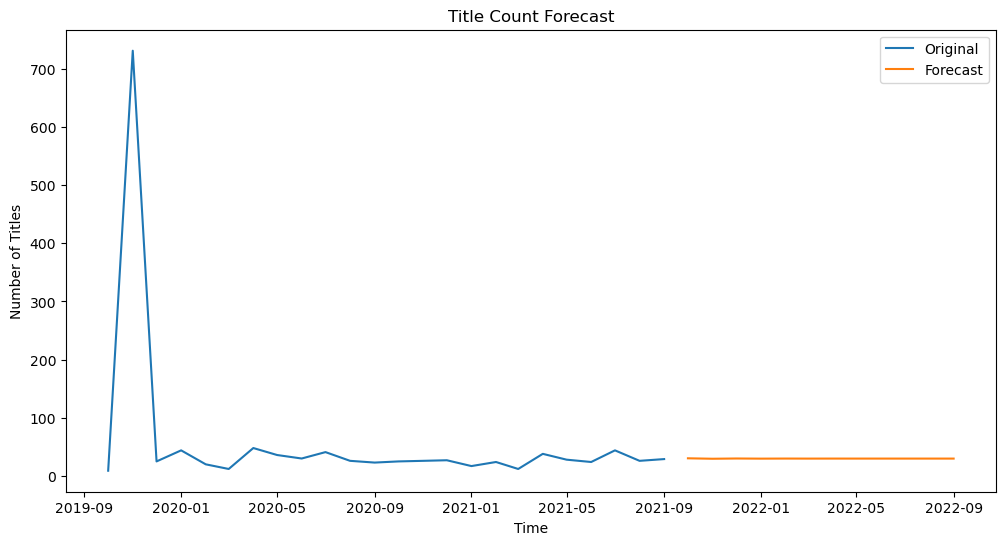

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


df = pd.read_csv('C:\\users\\banda\\downloads\\disney_plus_titles.csv')

df['date_added'] = pd.to_datetime(df['date_added'])

df['year_month'] = df['date_added'].dt.to_period('M').dt.to_timestamp()

time_series = df['year_month'].value_counts().sort_index()

time_series.index = pd.DatetimeIndex(time_series.index)
time_series = time_series.asfreq('MS')

time_series.plot(figsize=(12, 6))
plt.title('Number of Titles Added Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Titles')
plt.show()

decomposition = seasonal_decompose(time_series, model='additive', period=12)
fig = decomposition.plot()
plt.show()

model = ARIMA(time_series, order=(1, 1, 1))
fit = model.fit()
print(fit.summary())

forecast = fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=time_series.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original')
plt.plot(forecast_series, label='Forecast')
plt.title('Title Count Forecast')
plt.xlabel('Time')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\banda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


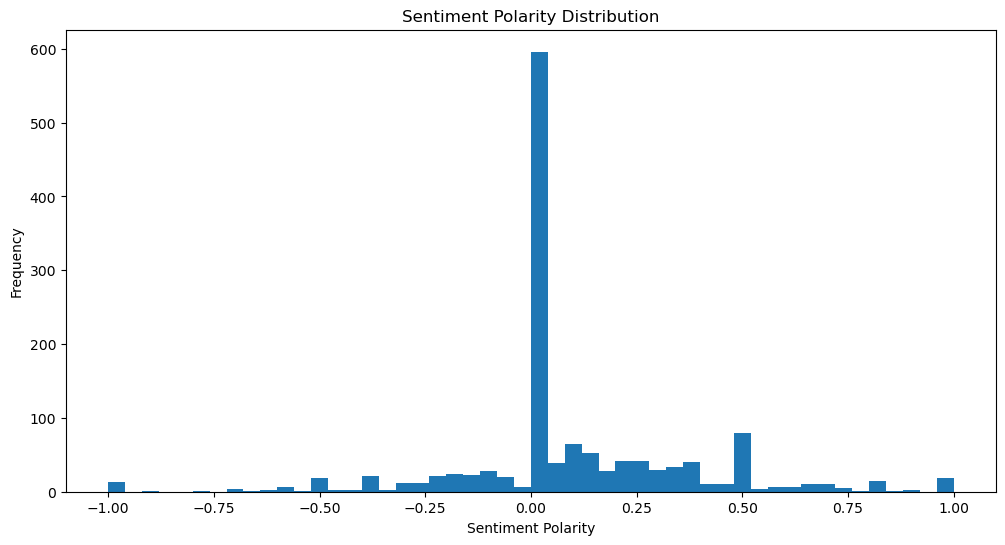

Topic 0:
['two', 'young', 'musical', 'world', 'friends', 'journey', 'time', 'disney', 'find', 'must']
Topic 1:
['story', 'dr', 'girl', 'school', 'team', 'city', 'adventures', 'star', 'family', 'new']
Topic 2:
['pluto', 'goofy', 'boy', 'world', 'adventure', 'donald', 'mickey', 'advisory', 'details', 'see']
Topic 3:
['dreams', 'famous', 'extraordinary', 'sea', 'show', 'crew', 'life', 'story', 'team', 'come']
Topic 4:
['christmas', 'moves', 'sharks', 'finds', 'race', 'discovers', 'learn', 'help', 'secret', 'kids']


In [20]:
!pip install nltk
!pip install textblob
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import matplotlib.pyplot as plt

nltk.download('stopwords')

df = pd.read_csv('C:\\users\\banda\\downloads\\disney_plus_titles.csv')

df['description'] = df['description'].astype(str).str.lower().str.replace('[^\w\s]', '', regex=True)
stop = set(stopwords.words('english'))
df['description_clean'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

df['sentiment'] = df['description_clean'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(12, 6))
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['description_clean'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


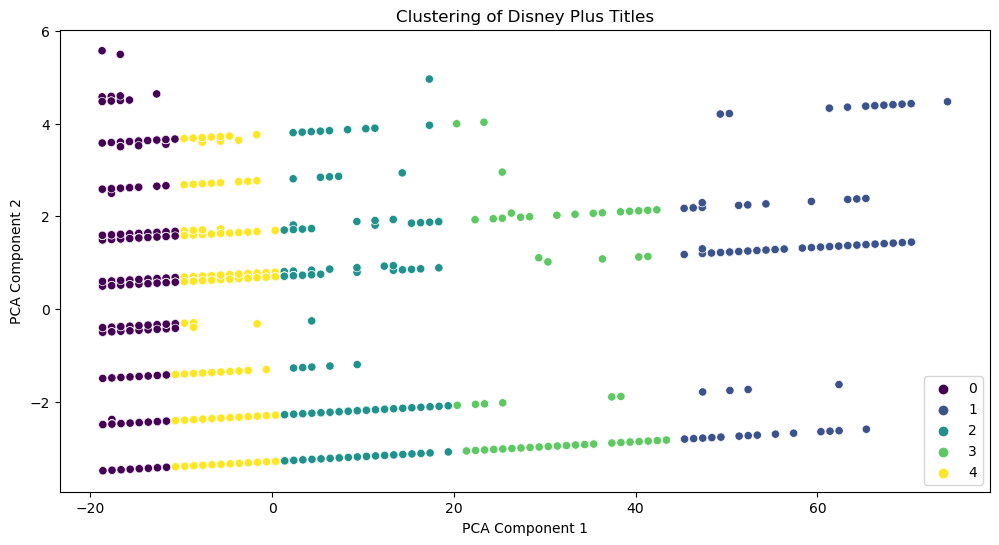

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

label_encoders = {}
for column in ['type', 'rating']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

features = ['type', 'rating', 'release_year']
X = df[features].dropna()

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Clustering of Disney Plus Titles')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
